**Data cleaning and question 1**

1) If I have a house with a waterfront view, what will further increase the price of my property?

We know that properties with a waterfront tend to be more expensive. What else would influence the price of a property with a waterfront view? As a related question, how else could a client increase the price of their property if they have a house with a waterfront view?

There are a limited amount of ways a client could change their property in order to improve it (for example, an individual has no influence over the size of their neighbours' houses). However, there are several ways a client might be able to improve their property: through renovation; through increasing the size of their property by adding a loft extension; through the introduction of another bathroom; through increasing the condition of their property; and through the grade of their property.

We will examine each of these in turn in order to determine which factors might be worth comparing in our linear regression.

Note: we will be examining factors which seem highly correlated with others individually, since we can check for multicoliearity in our final model if necessary.

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df.duplicated(subset=None, keep='first')

duplicated_rows_df = df[df.duplicated()]

print(duplicated_rows_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


This tells us that there are no duplicate rows based on all columns in the dataframe - we don't need to worry about deleting rows which are exact duplicates of each other for all columns.

**Waterfront view**

We want to work with the houses which have a waterfront view only and see which futher factors will influence their price.

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [6]:
df['waterfront'].isna().sum()

2376

In [7]:
df['waterfront'].mode()

0    0.0
dtype: float64

This shows us that the ratio for houses which have a waterfront and those which do not is 50:17835, or 10:3567, or 1:356.7. In other words, for every 1 house which has a waterfront view, 356.7 houses do not. 

Replacing any of the null values with a 1 (indicating the presence of a waterfront view) would require us to create another model to predict how likely the houses in question are to have a waterfront view, and this would require too much time.

We have decided to replace all the null values in the waterfront column with 0, because this is mode value for that column.

In [8]:
df["waterfront"].fillna(int(0), inplace = True)

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
df['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

We now want to focus on the subset of data relating to houses with a waterfront only.

In [11]:
df_waterfront_only = df.loc[df['waterfront'] > 0.0]

In [12]:
df_waterfront_only.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


In [14]:
df_waterfront_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 49 to 21560
Data columns (total 21 columns):
id               146 non-null int64
date             146 non-null object
price            146 non-null float64
bedrooms         146 non-null int64
bathrooms        146 non-null float64
sqft_living      146 non-null int64
sqft_lot         146 non-null int64
floors           146 non-null float64
waterfront       146 non-null float64
view             145 non-null float64
condition        146 non-null int64
grade            146 non-null int64
sqft_above       146 non-null int64
sqft_basement    146 non-null object
yr_built         146 non-null int64
yr_renovated     121 non-null float64
zipcode          146 non-null int64
lat              146 non-null float64
long             146 non-null float64
sqft_living15    146 non-null int64
sqft_lot15       146 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 25.1+ KB


**Sales Price**

Our target is sales price. We want to make sure that the values we use as part of the sales price series are free of mistakes and blank rows. 

In [15]:
df_waterfront_only['price'].isna().any()

False

We don't need to worry about deleting or dealing with null values in the sales column.

In [17]:
df_waterfront_only['price'].dtype

dtype('float64')

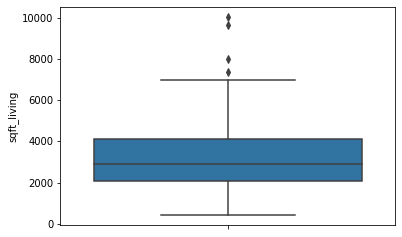

In [23]:
sns.boxplot(y = 'sqft_living', data = df_waterfront_only, showfliers = True)

We don't want to delete price outliers from our dataframe because this will reduce the available data we have too much (so much that the available dataset will be too small to work with). Moreover, given that houses with a waterfront view tend to be more expensive, we are interested in keeping them to use in our model, and focusing on the luxury end of the housing market.

**Factors which could influence the sales price of the house.**

**Sqft living**

In [19]:
df_waterfront_only['sqft_living'].isna().any()

False

In [20]:
df_waterfront_only['sqft_living'].dtype

dtype('int64')

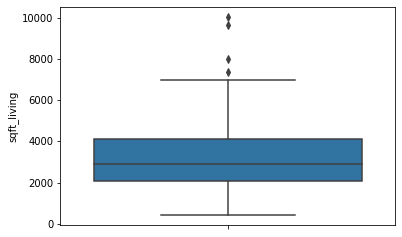

In [27]:
sns.boxplot(y = 'sqft_living', data = df_waterfront_only, showfliers = True)

We can see from this distribution here that there are some outliers in terms of the sqft living area of the houses in our waterfront dataset. However, we are interested in these luxury houses and wish to leave them in our dataset.

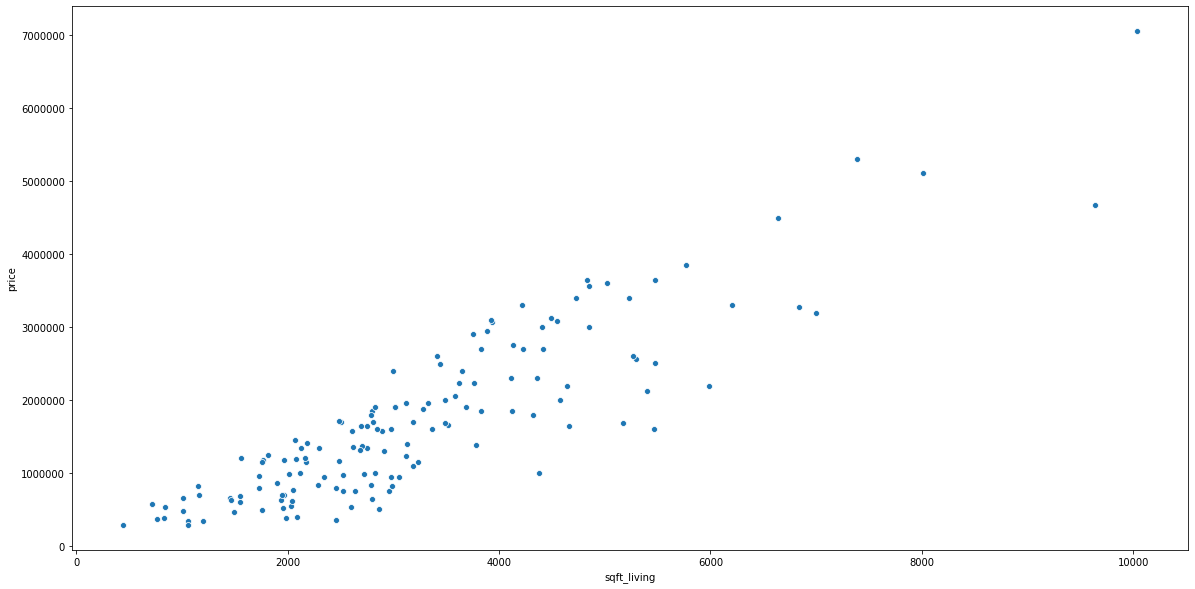

In [25]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df_waterfront_only)

We can see here that the sqft living area of a home with a waterfront view increases in line with the price.
Should a client wish to increase the price of their house even further, and if the sqft living area of a house turns out to be a strong predictor for its price, we might be able to advise them to increase the size of their sqft living ara (by adding a loft extension to the house, for example).

**Floors**

In [30]:
df_waterfront_only['floors'].isna().any()

False

In [32]:
df_waterfront_only['floors'].value_counts()

2.0    69
1.0    53
1.5    16
3.0     6
2.5     2
Name: floors, dtype: int64

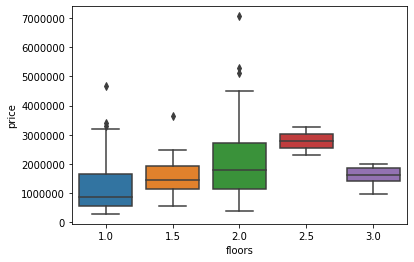

In [36]:
sns.boxplot(x = 'floors', y = 'price', data = df_waterfront_only)

This boxplot suggests that the price of houses with a waterfront view increases as the number of floors increases, until 2.5 floors is reached (this seems to be the cut-off point for the trend). If the number of floors proves to be a strong predictor in our final model, we might suggest a client adds a mezzanine to add value to their property before selling it.

**Renovation**

We can see that there are a number of nan values in the yr_renovated column, which we need to deal with. Given that the vast majority of houses have not been renovated, we have decided to replace these nan values with the mode, which is 0 (0 means a house has never been renovated).

In [39]:
df_waterfront_only['yr_renovated'].isna().value_counts()

False    121
True      25
Name: yr_renovated, dtype: int64

In [41]:
df_waterfront_only['yr_renovated'].mode()

0    0.0
dtype: float64

In [43]:
(df_waterfront_only['yr_renovated'] == 0.0).value_counts()

True     92
False    54
Name: yr_renovated, dtype: int64

We can infer from this information that 29 waterfront view properties have been renovated. The mode of the renovation column for properties with a waterfront is 0. We will therefore replace the null values in the renovated column with the mode.

In [44]:
df_waterfront_only["yr_renovated"].fillna(int(0), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
df_waterfront_only.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,7,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,9,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,5,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508


In [46]:
df_waterfront_only['yr_renovated'].isna().value_counts()

False    146
Name: yr_renovated, dtype: int64

We have replaced the null values in the renovated column with the mode.

In [47]:
(df_waterfront_only['yr_renovated'] == 0.0).value_counts()

True     117
False     29
Name: yr_renovated, dtype: int64

We can now compare the properties which have been renovated and those which haven't.

In [55]:
df_waterfront_only.loc[df_waterfront_only['yr_renovated'] > 0, "renovated"] = "Yes"

In [56]:
df_waterfront_only.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513,NaN
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193,Yes
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841,NaN
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,NaN
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,NaN


In [57]:
df_waterfront_only['renovated'].value_counts()

Yes    29
Name: renovated, dtype: int64

In [58]:
df_waterfront_only["renovated"].fillna(str("No"), inplace = True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
df_waterfront_only.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,...,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513,No
230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,...,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193,Yes
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,...,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841,No
264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,...,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267,No
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,...,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508,No


In [60]:
df_waterfront_only['renovated'].value_counts()

No     117
Yes     29
Name: renovated, dtype: int64

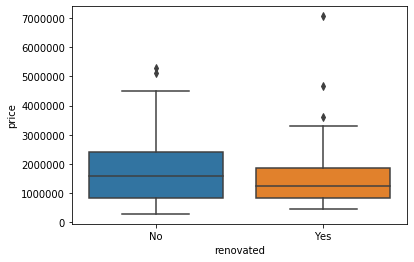

In [61]:
sns.boxplot(x = 'renovated', y = 'price', data = df_waterfront_only)

It looks like renovating a house with a waterfront view does not affect increase the salesprice. However, this effect could be due to the fact that so few houses with a waterfront view have actually been renovated.

**Grade**

In [69]:
df_waterfront_only['grade'].isna().any()

False

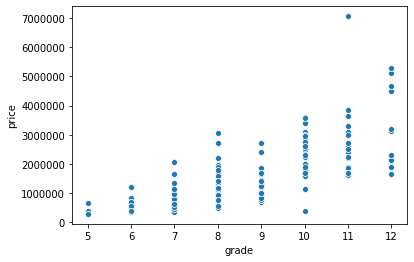

In [62]:
ax = sns.scatterplot(x="grade", y="price",
                      data=df_waterfront_only)

It seems that the higher the grade of a house with a waterfront view, the higher its price. If this is found to be a strong predictor in our final model, we might suggest to clients that they try and improve the grade of their house according to the King County grading system.

**Bathrooms**

In [65]:
df_waterfront_only['bathrooms'].dtype

dtype('float64')

In [68]:
df_waterfront_only['bathrooms'].isna().any()

False

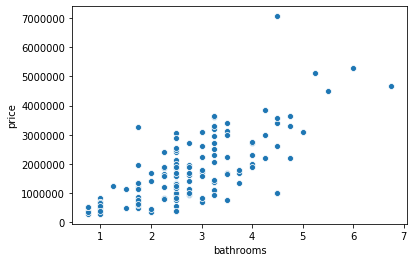

In [70]:
ax = sns.scatterplot(x="bathrooms", y="price",
                      data=df_waterfront_only)

It seems that the higher the number of bathrooms in a house with a waterfront view, the higher its price. If this is found to be a strong predictor in our final model, we might suggest to clients that they try and install additional bathrooms or bathroom units (single toilets with a sink, for example) in their house.

We have considered the factors which a client might be able to influence themselves when selling the price. However, we must be wary of multicolinearity. As we saw in the pairwise correlation in our introduction document, the sqft living area of a house is highly correlated with its grade and the number of bathrooms it has. When we carry out the regression, we will have to be wary of this and may not be able to use them alongside each other.

From our pairwise correlation in the introduction document, the correlation between a house's sqft living space and the number of floors is not particularly strong (0.35). We do not need to worry about multicolinearity here. The sqft living area and number of floors can be considered as separate factors.

If we do decide to investigate houses with a waterfront view further, and it turns out the above factors are multicolinear, we will be able to see whether sqft living space or number of floors affects the price of a house with a waterfront view more.